In [11]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from data.storage_tradeoff_data import T, t, p, u
p = p.reshape(T)
u = u.reshape(T)

def solve(Q, C, D):
    q1 = cp.Variable(1)
    c = cp.Variable(T)
    q = cp.hstack([q1, cp.cumsum(c)[:-1]])

    constraints = [
            q <= Q,
            q >= 0,
            c <= C,
            c >= -D,
            q[-1] + c[-1] == q[0],
            u + c >= 0,
            ]

    obj = cp.Minimize(p @ (u + c))
    problem = cp.Problem(obj, constraints)
    problem.solve()
    return q.value, c.value, problem.value

def kplot(t, p, u, q, c):
    plt.plot(t, p, 'g')
    plt.plot(t, u, 'r')
    plt.plot(t, q, 'b')
    plt.plot(t, c, 'y')
    plt.show()

def partb():
    Q = 35
    C = 3
    D = 3
    q, c, _ = solve(Q, D, C)
    kplot(t, p, u, q, c)

def partc():
    n = 150
#    Qs = np.linspace(0, 150, n)
    Qs = np.arange(n)
    for i, cd_limit in enumerate([1, 3]):
        C = cd_limit
        D = cd_limit
        cost = np.vectorize(lambda Q: solve(Q, C, D)[-1])(Qs)
        color = 'r' if i == 0 else 'g'
        plt.plot(Qs, cost, color)
#         plt.axvline(x=T/2 * cd_limit, color=color, linestyle='--')
    plt.show()

## Part b: 

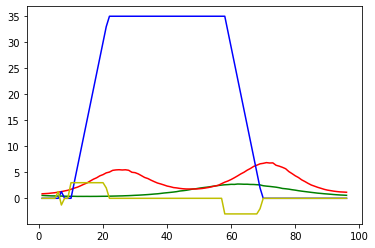

In [12]:
partb()

## Part c:

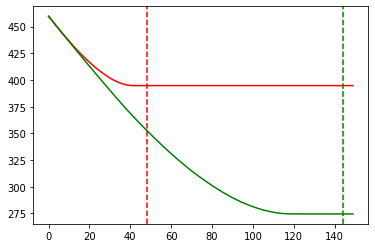

Total time: 9.596889972686768


In [13]:
import time
t0 = time.time()
partc()
t1 = time.time()
total_time = t1 - t0
print(f"Total time: {total_time}")

## The interpertation is in the pdf file